# pip installs

In [25]:
%pip install numpy
%pip install matplotlib
%pip install graphviz



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# imports

In [173]:
import math
import numpy as np 
import matplotlib.pyplot as plt
# %matplotlib inline
import torch
import random

from graphviz import Digraph


In [12]:
def f(x):
    return 3*x**2 - 4*x + 5

In [13]:
f(3.0)

20.0

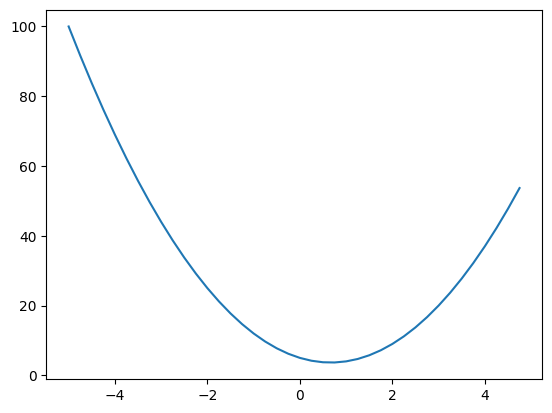

In [14]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [15]:
# what is the deraivitive of ys
h = 0.001
x = -3.0

#finding the numerical oprocumation of the slope
print(f'At {x} the slope is {(f(x + h) - f(x)) / h}')

At -3.0 the slope is -21.996999999998934


In [16]:
# lets get to a more complex case
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [17]:
h = 0.0001

# inputs

a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print(f'slope: {(d2-d1)/h}')

d1 4.0
d2 3.999699999999999
slope: -3.000000000010772


In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        # Provides a way to print a nice version in python.
        return f"Value(data={self.data})"
    
    def __add__(self, other):

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        
        out._backward = _backward
        return out
    
    def __mul__(self, other):

        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = (other.data) * out.grad
            other.grad= self.data * out.grad
        
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x) + 1) # tanh equation
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1-t**2) * out.grad
            
        out._backward = _backward

        return out


In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'

In [93]:
def trace(root):
    # Builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges
    
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid +n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges: 
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


In [88]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

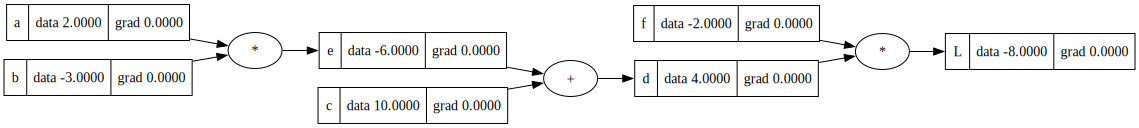

In [94]:
draw_dot(L)

In [58]:
# Finding the deravitive of L in respect to a
def lol():
    h = 0.0001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data


    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print(f"DL/Da {(L2 - L1)/h}")

lol()

DL/Da 6.000000000021544


# Example of an Activation function
## When it get bigger than 1 it gets smaller in the -1 dirrection it gets closer to -1 and at 0 it is 0

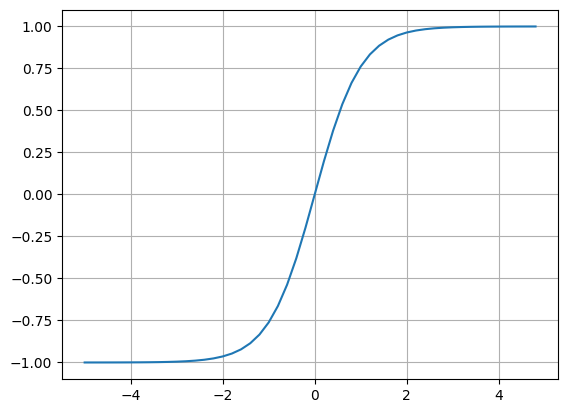

In [66]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

# Example of a Neuron

In [71]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of teh neuron 
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label =  'x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

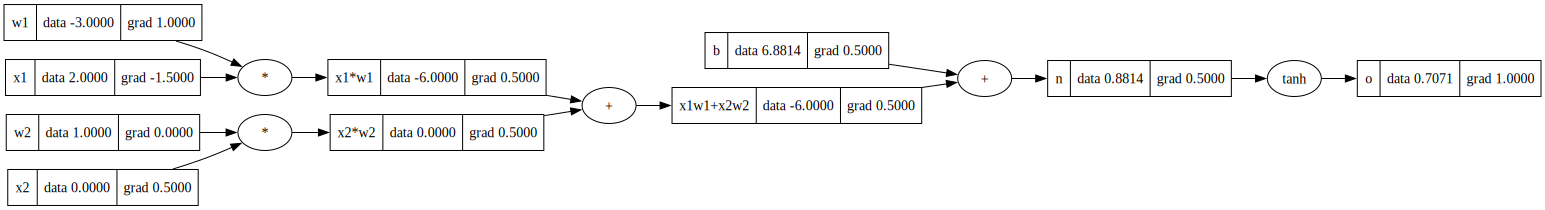

In [80]:

draw_dot(o)

# Back propogation of the Neuron

In [84]:
o.grad = 1.0 # base case the deravitive of itself is always 1
# o = tanh(n)
# what is do/dn 
# do/dn = 1 - tanh(n)**2 = 1 - o**2
n.grad = 1 - o.data**2
n.grad = 0.5
x1w1x2w2.grad = n.grad * 1 # because +
b.grad = n.grad * 1 # because + 

x2w2.grad = 0.5 # because + 
x1w1.grad = 0.5 # because + 

x2.grad = w2.data * x2w2.grad # because *
w2.grad = w2.grad * x2w2.grad # because *

w1.grad = x1.data * x1w1.grad # because *
x1.grad =  w1.data * x1w1.grad # because *


# After backpropagation of teh Neuron

In [85]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value((-3.0 + + (0.001 * w1.grad)), label='w1') 
w2 = Value((1.0 + (0.001 * w2.grad)), label='w2') 
# bias of teh neuron 
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label =  'x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

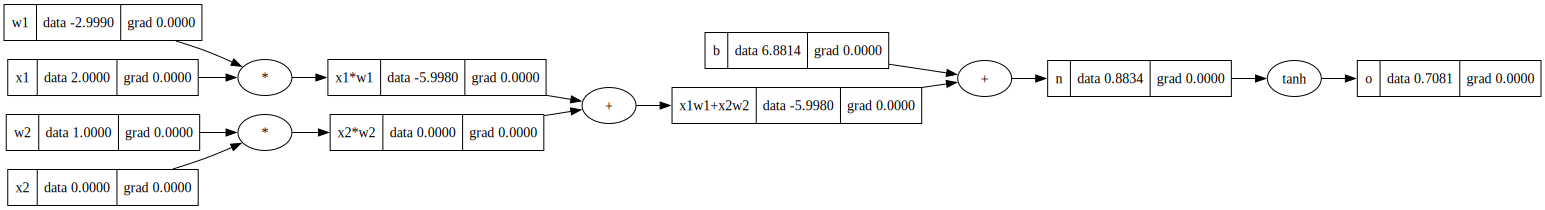

In [86]:
draw_dot(o)

# BackPropogation automatiacly

In [114]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of teh neuron 
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label =  'x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

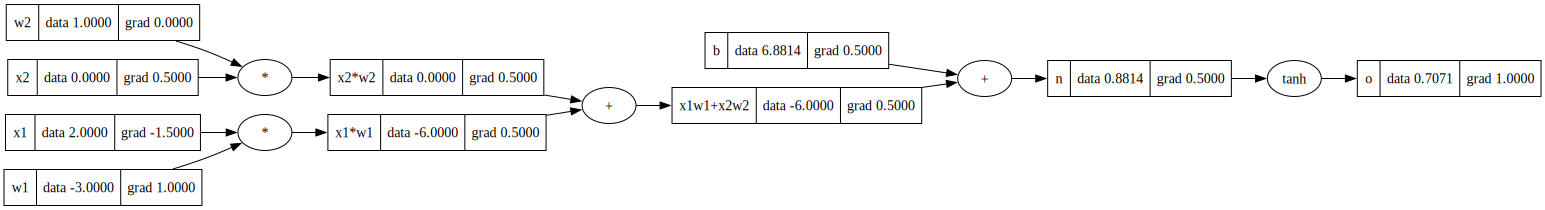

In [121]:
draw_dot(o)

## Creating a topological short to get the order of nodes to call:

In [ ]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

build_topo(o)
topo


[Value(data=6.881373587019543),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [120]:
for node in reversed(topo):

    if node == topo[-1]:
        node.grad = 1
    
    node._backward()


In [112]:
o.grad = 1
o._backward()
n._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

## Add the topo into the class

In [126]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        # Provides a way to print a nice version in python.
        return f"Value(data={self.data})"
    
    def __add__(self, other):

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        
        out._backward = _backward
        return out
    
    def __mul__(self, other):

        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = (other.data) * out.grad
            other.grad= self.data * out.grad
        
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x) + 1) # tanh equation
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1-t**2) * out.grad
            
        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1
        for node in reversed(topo):
            node._backward()




In [127]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of teh neuron 
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label =  'x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

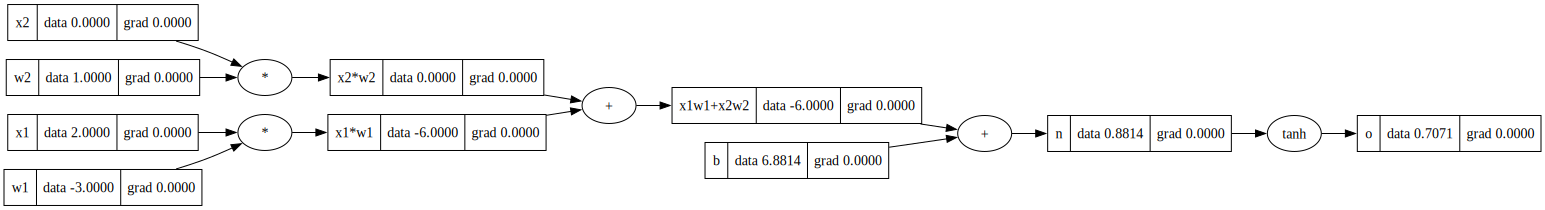

In [128]:
draw_dot(o)

In [129]:
o.backward()

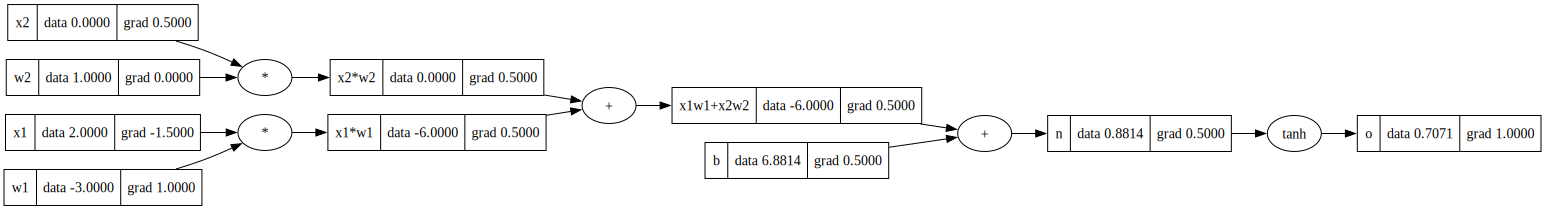

In [130]:
draw_dot(o)

# Fixing Bug

In [133]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()

## The bug is that the 'a' node isn't showing up twice witch means the derivative is not correct.
`it is incorrect because we are overwriting the same object as it is the same`

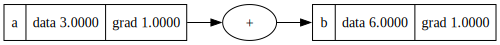

In [135]:
draw_dot(b)

# Another Bug Example:

In [137]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b   ; d.label = 'd'
e = a + b   ; e.label =  'e'
f = d * e   ; f.label = 'f'

f.backward()

# We are going to see an Issue every time we use the same variable more than once

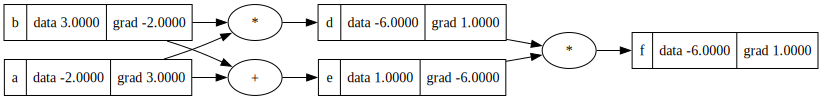

In [138]:
draw_dot(f)

## Fixing this bug:
- what we will need to do is equmalate the gradiance `+=`
- this is okay because they all start with `0`

In [139]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        # Provides a way to print a nice version in python.
        return f"Value(data={self.data})"
    
    def __add__(self, other):

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        return out
    
    def __mul__(self, other):

        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += (other.data) * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x) + 1) # tanh equation
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1-t**2) * out.grad
            
        out._backward = _backward

        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1
        for node in reversed(topo):
            node._backward()


In [140]:
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()

# Now it is fixed

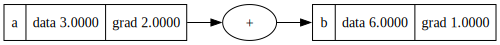

In [141]:
draw_dot(b)

In [142]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b   ; d.label = 'd'
e = a + b   ; e.label =  'e'
f = d * e   ; f.label = 'f'

f.backward()

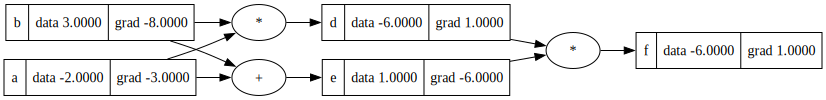

In [143]:
draw_dot(f)

# Adding the ability to add Not only `Value` objects

In [227]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [228]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of teh neuron 
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label =  'x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()

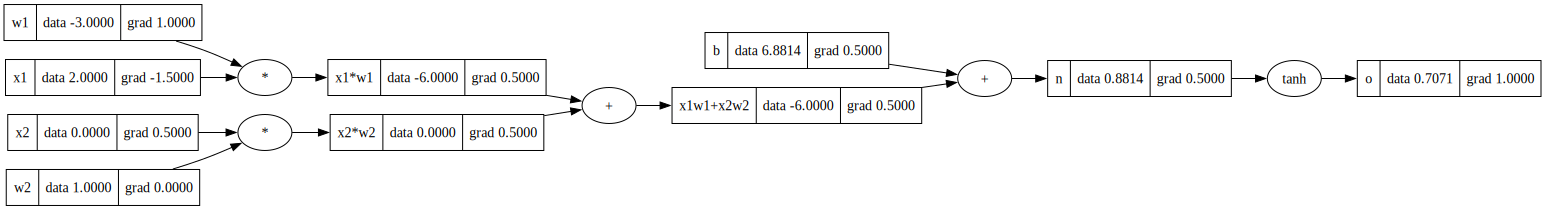

In [229]:
draw_dot(o)

In [230]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of teh neuron 
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label =  'x1w1+x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----------
e = (2*n).exp()
o = (e-1)/(e+1)
# ---------
o.label = 'o'
o.backward()

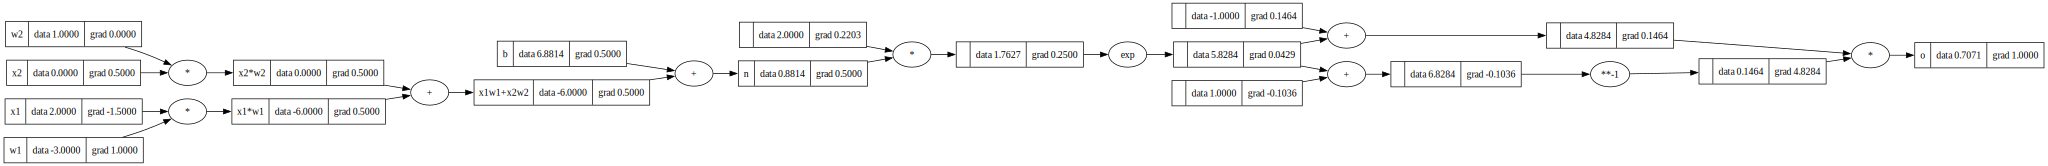

In [231]:
draw_dot(o)

# How to do BackPropogation with pytourch
- tensors: are just n-dimesional arrays of scalars

In [232]:
x1 = torch.Tensor([2.0]).double()   ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()   ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()   ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()   ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()   ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [233]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [234]:
o.item()

0.7071066904050358

# We can start building Neural Nets:

`neural nets are just a specific class of mathmatical expresions` 

In [247]:
# Bulding a Nueron:
class Neuron:

    def __init__(self, nin):
        # Generating random values for weight that are in between -1 and 1
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)] 
        #And a random bias for this specific neuron that is between -1 and 1
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):

        # w * x * b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    

    def parameters(self):
        return self.w + [self.b]
    
class Layer():

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):

        params = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params

class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


# Neural network Example
![Alt text](Images/NeuralNetworkEX.png)

In [248]:
x = [2.0, 3.0, -1] # input vector
n = MLP(3, [4,4,4,1])
n(x)

Value(data=0.000295258987393726)

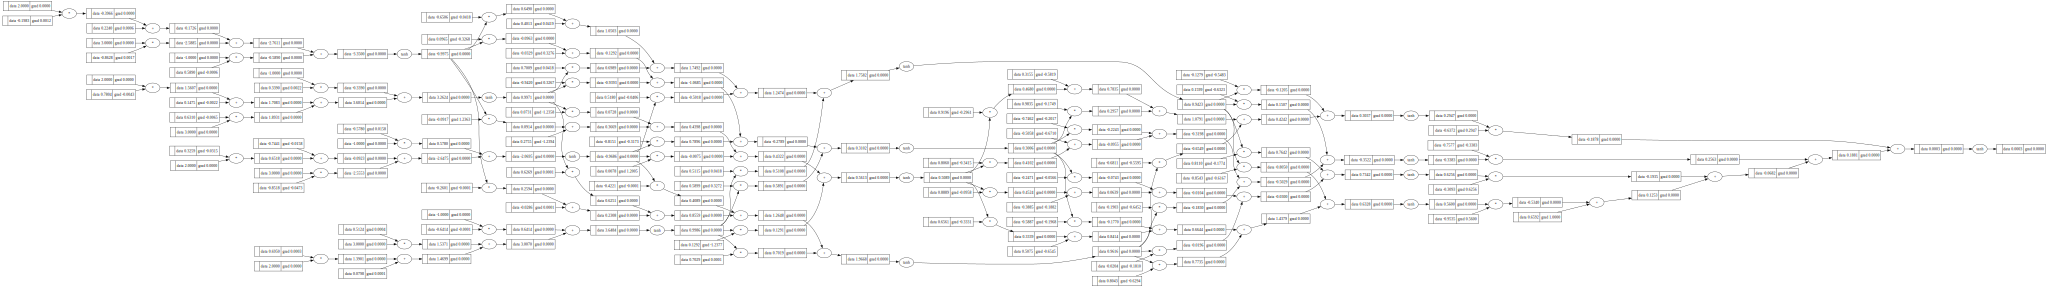

In [250]:
n(x).backward()
draw_dot(n(x))

# Example Dataset 
- 4 possible inputs
- 4 desired `targets`


Simple Binary Classeifier Neural Net 

In [277]:
n = MLP(3,[4,4,1])
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5, 1.0, 1.0],
    [1.0,1.0,-1.0]
]
ys = [Value(v) for v in [1.0, -1.0, -1.0, 1.0]] # Desired Targets
ypred = [n(x) for x in xs]
ypred

[Value(data=0.8766541860109471),
 Value(data=0.948120892021992),
 Value(data=0.8854578117408511),
 Value(data=0.9056479699252753)]

# To see how we need to change the neural networks we need to put it through a loss function
`Mean Squared Error Loss`:


It is defined as:


MSE = (1/n) * Σ (ŷᵢ - yᵢ)²

Where:
- ŷᵢ = predicted value
- yᵢ = actual value
- n = number of samples

In [278]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=7.374242665195005)

# The Magic

In [279]:
loss.backward()

In [280]:
n.layers[0].neurons[0].w[0].grad

-0.07968877302276717

In [281]:
n.layers[0].neurons[0].w[0].data

-0.7685523232085056

In [282]:
for p in n.parameters():
    p.data += p.grad * -0.01 # negative sign because we want to decrease the loss and not to increase it.

In [283]:
n.layers[0].neurons[0].w[0].grad

-0.07968877302276717

In [284]:
n.layers[0].neurons[0].w[0].data

-0.767755435478278

In [285]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=7.332381845862877)

# Have to Itterate this process to make the loss function lower each time

In [296]:
n = MLP(3,[4,4,1])
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5, 1.0, 1.0],
    [1.0,1.0,-1.0]
]
ys = [Value(v) for v in [1.0, -1.0, -1.0, 1.0]] # Desired Targets

In [297]:
for k in range(400):

    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.005 * p.grad

    if k%20 == 0:
        print(k, loss.data)
    

0 4.841536382131247
20 3.7964279921997126
40 2.4114479821857357
60 0.9797733025231434
80 0.44801939667291074
100 0.2562903011033151
120 0.17033895977264407
140 0.12431872750878457
160 0.09646811039771302
180 0.0781066762801307
200 0.06522502428753414
220 0.055754975400966515
240 0.04853557310119366
260 0.0428704803544428
280 0.03831925863112241
300 0.0345909686837143
320 0.031486363340916756
340 0.028864771822051195
360 0.026624261971086333
380 0.024689294196483587


# Now lets look its very good:

In [295]:
ypred

[Value(data=0.9570732423294027),
 Value(data=-0.9717965063526429),
 Value(data=-0.9186822621522924),
 Value(data=0.9178568486946174)]